In [42]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [44]:
X_train = np.loadtxt(r"C:/Users/KIIT/Documents/HandwrittenDigitRecognition/train_X.csv", delimiter=',').T
Y_train=np.loadtxt(r"C:/Users/KIIT/Documents/HandwrittenDigitRecognition/train_label.csv", delimiter=',').T

In [45]:
X_test=np.loadtxt(r"C:/Users/KIIT/Documents/HandwrittenDigitRecognition/test_X.csv", delimiter=',').T
Y_test=np.loadtxt(r"C:/Users/KIIT/Documents/HandwrittenDigitRecognition/test_label.csv", delimiter=',').T

In [46]:
print("shape of X_train is ",X_train.shape) #1000 represents amount of data ,350 in test data X#

shape of X_train is  (784, 1000)


In [47]:
Y_train.shape

(10, 1000)

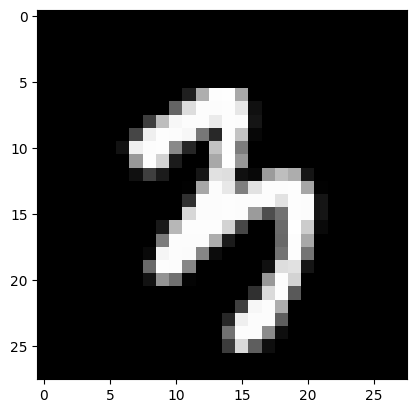

In [85]:
import random

index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap='grey')
plt.show()

In [86]:
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX,axis=0)

In [99]:
def derivative_tanh(x):
    return (1-np.power(np.tanh(x),2))
def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)
    
    

In [100]:

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01  # Random weights (4x3)
    b1 = np.zeros((n_h, 1))               # Bias vector (4x1)
    w2 = np.random.randn(n_y, n_h) * 0.01 # Random weights (2x4)
    b2 = np.zeros((n_y, 1))               # Bias vector (2x1)
    
    parameter = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }
    return parameter

## forward propogation
## z1=W1*X +b1
## A1=f(Z1)
## Z2=W2*A1+B2
## A2=softmax(Z2)

In [101]:
def forward_propagation(x,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    z1=np.dot(w1,x)+b1
    a1=tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    forward_cache={
        "z1":z1,
        "a1":a1,
        "z2":z2,
        "a2":a2,
        
    }
    return forward_cache

## cost function

In [102]:
def cost_function(a2,y):
     m=y.shape[1]
     cost=-(1/m)*np.sum(y*np.log(a2))
     #cost=-(1/m)*np.sum(np.sum(y*np.log(a2,0),1))
     return cost

# backpropogation

In [103]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [104]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [105]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [115]:
iterations = 100
n_h = 1000
learning_rate = 0.009
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.3749619392021013
Cost after 10 iterations is : 1.6483609521870672
Cost after 20 iterations is : 1.2651199124777845
Cost after 30 iterations is : 1.0383797478550578
Cost after 40 iterations is : 0.8909039851185211
Cost after 50 iterations is : 0.7873765104293934
Cost after 60 iterations is : 0.7103110411200999
Cost after 70 iterations is : 0.6503158958896109
Cost after 80 iterations is : 0.6019662597125172
Cost after 90 iterations is : 0.5619286220135292


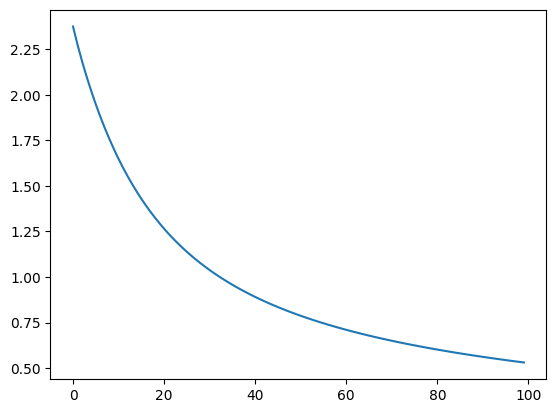

In [116]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [117]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [118]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 90.8 %
Accuracy of Test Dataset 83.14 %


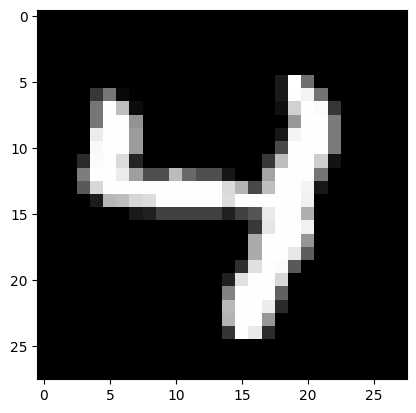

Our model says it is : 4


In [123]:

idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])